## 모델 성능 검증
* 광물 예측

### 데이터 읽어오기

In [1]:
import pandas as pd

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/sonar3.csv', header=None)
df.head()

fatal: destination path 'data' already exists and is not an empty directory.


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [2]:
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [3]:
X = df.iloc[:,:60]
y = df.iloc[:,60]

### 모델 구성 및 훈련

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
21/21 [==============================] - 1s 2ms/step - loss: 0.7057 - accuracy: 0.4952
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5529
Epoch 3/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.6394
Epoch 4/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6589 - accuracy: 0.6731
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.6731
Epoch 6/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.7067
Epoch 7/200
21/21 [==============================] - 0s 2ms/step - loss: 0.6110 - accuracy: 0.7308
Epoch 8/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.7163
Epoch 9/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5709 - accuracy: 0.7500
Epoch 10/200
21/21 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.7452
Epoch 11/

### 결과 확인

In [5]:
print(model.evaluate(X))

7/7 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0]


### Train_set, Test_set 분리하여 검증

In [ ]:
# %pip install -U scikit-learn

In [12]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
15/15 [==============================] - 1s 2ms/step - loss: 0.6861 - accuracy: 0.5172
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6414
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6570 - accuracy: 0.6897
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.7379
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7379
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.7379
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.6897
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6047 - accuracy: 0.7517
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5922 - accuracy: 0.7724
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7862
Epoch 11/

In [18]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.6175 - accuracy: 0.8413
Test accuracy: 0.841269850730896


## 모델 저장 및 불러오기

In [19]:
model.save('sonar_model.hdf5')

In [20]:
from tensorflow.keras import models
model_imported = models.load_model('sonar_model.hdf5')

In [21]:
model_imported.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.6175 - accuracy: 0.8413


[0.6175053715705872, 0.841269850730896]

## 14장 모델 성능 향상시키기

### 1 데이터의 확인과 검증셋

In [24]:
import pandas as pd

!git clone https://github.com/taehojo/data.git

df = pd.read_csv('./data/wine.csv', header=None)
df.head()

fatal: destination path 'data' already exists and is not an empty directory.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [25]:
X = df.iloc[:,:12]
y = df.iloc[:,12]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [33]:
from tensorflow import keras

model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim=12, activation='relu'))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                390       
                                                                 
 dense_11 (Dense)            (None, 12)                372       
                                                                 
 dense_12 (Dense)            (None, 8)                 104       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_batch_size=0.25)

Epoch 1/50
11/11 [==============================] - 1s 2ms/step - loss: 21.3864 - acc: 0.2469
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 15.3864 - acc: 0.2469
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 9.2142 - acc: 0.2469
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 3.6968 - acc: 0.2469
Epoch 5/50
11/11 [==============================] - 0s 3ms/step - loss: 0.9975 - acc: 0.3123
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 0.6830 - acc: 0.5896
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 0.6248 - acc: 0.7556
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 0.6013 - acc: 0.8197
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 0.5896 - acc: 0.8615
Epoch 10/50
11/11 [==============================] - 0s 3ms/step - loss: 0.5817 - acc: 0.8780
Epoch 11/50
11/11 [==============================] - 0s 3ms/step - 

In [31]:
score = model.evaluate(X_test, y_test)
print('Test accurity:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.1545 - acc: 0.9462
Test accurity: 0.9461538195610046


### 2 모델 업데이트하기

In [57]:
import os
MODLE_DIR = './model/'

if not os.path.exists(MODLE_DIR):
    os.mkdir(MODLE_DIR)

In [83]:
from tensorflow.keras.callbacks import ModelCheckpoint
# modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
modelpath = './model/best_model.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor = 'val_accuracy', verbose=1, save_weights_only=True)

del model
model = Sequential()

model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_142 (Dense)           (None, 30)                390       
                                                                 
 dense_143 (Dense)           (None, 12)                372       
                                                                 
 dense_144 (Dense)           (None, 8)                 104       
                                                                 
 dense_145 (Dense)           (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [91]:
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.3, callbacks=[checkpointer])

Epoch 1/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0301 - acc: 0.9940
Epoch 1: saving model to ./model\best_model.hdf5


c:\Users\YGL\anaconda3\envs\ML_Demo\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


8/8 [==============================] - 0s 18ms/step - loss: 0.0356 - acc: 0.9882 - val_loss: 0.0545 - val_acc: 0.9846
Epoch 2/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0526 - acc: 0.9820
Epoch 2: saving model to ./model\best_model.hdf5
8/8 [==============================] - 0s 11ms/step - loss: 0.0407 - acc: 0.9879 - val_loss: 0.0376 - val_acc: 0.9885
Epoch 3/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0365 - acc: 0.9880
Epoch 3: saving model to ./model\best_model.hdf5
8/8 [==============================] - 0s 10ms/step - loss: 0.0370 - acc: 0.9887 - val_loss: 0.0410 - val_acc: 0.9859
Epoch 4/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0338 - acc: 0.9880
Epoch 4: saving model to ./model\best_model.hdf5
8/8 [==============================] - 0s 11ms/step - loss: 0.0319 - acc: 0.9907 - val_loss: 0.0285 - val_acc: 0.9923
Epoch 5/2000
1/8 [==>...........................] - ETA: 0s - loss: 0.0226 - acc: 0.9960
Epoch 5: saving model to 

In [85]:
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.0356 - acc: 0.9900
Test accuracy: 0.9900000095367432


### 3 그래프로 과적합 확인하기

In [86]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

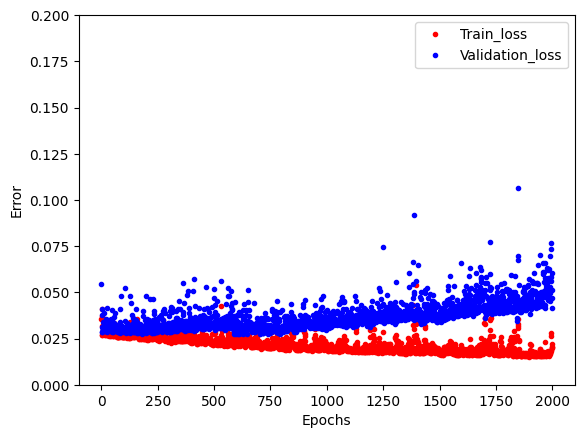

In [95]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

fig, ax = plt.subplots()
ax.plot(train_loss, 'r.', label='Train_loss')
ax.plot(validation_loss, 'b.', label='Validation_loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Error')
ax.legend()
ax.set_ylim(0, 0.2)
plt.show()

### 4 학습의 자동중단

In [96]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [97]:
modelpath = './data/model/Ch14-4-bestmodel.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [102]:

del model
model = Sequential()

model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')
history = model.fit(X_train, y_train, epochs=2000, batch_size=200, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_146 (Dense)           (None, 30)                390       
                                                                 
 dense_147 (Dense)           (None, 12)                372       
                                                                 
 dense_148 (Dense)           (None, 8)                 104       
                                                                 
 dense_149 (Dense)           (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000


c:\Users\YGL\anaconda3\envs\ML_Demo\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


20/20 [==============================] - 1s 12ms/step - loss: 0.4073 - acc: 0.8068 - val_loss: 0.2183 - val_acc: 0.9354
Epoch 2/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.2260 - acc: 0.9246 - val_loss: 0.1867 - val_acc: 0.9400
Epoch 3/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.2076 - acc: 0.9264 - val_loss: 0.1791 - val_acc: 0.9385
Epoch 4/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.2052 - acc: 0.9264 - val_loss: 0.1958 - val_acc: 0.9323
Epoch 5/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.2024 - acc: 0.9274 - val_loss: 0.1739 - val_acc: 0.9400
Epoch 6/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.1966 - acc: 0.9274 - val_loss: 0.1681 - val_acc: 0.9400
Epoch 7/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.1943 - acc: 0.9287 - val_loss: 0.1654 - val_acc: 0.9392
Epoch 8/2000
20/20 [==============================] - 0s 4ms/step - loss: 0.1924 - acc: 

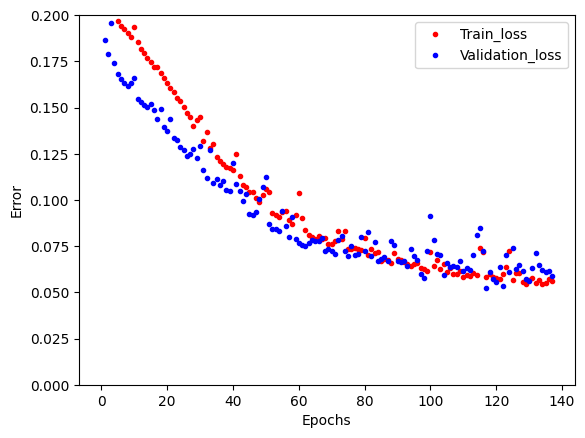

In [103]:
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

fig, ax = plt.subplots()
ax.plot(train_loss, 'r.', label='Train_loss')
ax.plot(validation_loss, 'b.', label='Validation_loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Error')
ax.legend()
ax.set_ylim(0, 0.2)
plt.show()